# Continuous Probabilistic Methods Exercises

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5

In [3]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return lower_bound,upper_bound

In [4]:
# Using lemonade.csv dataset and focusing on continuous variables:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)
# df = pd.read_csv("lemonade.csv")
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [5]:
# Change date column (mm/dd/yy) to standard date (yyy-mm-dd)
df.Date = pd.to_datetime(df.Date)
# Set index key to date
df = df.set_index("Date")
# Pull in a "month" column for graph
df["month"] = df.index.month_name()
# Take a look
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


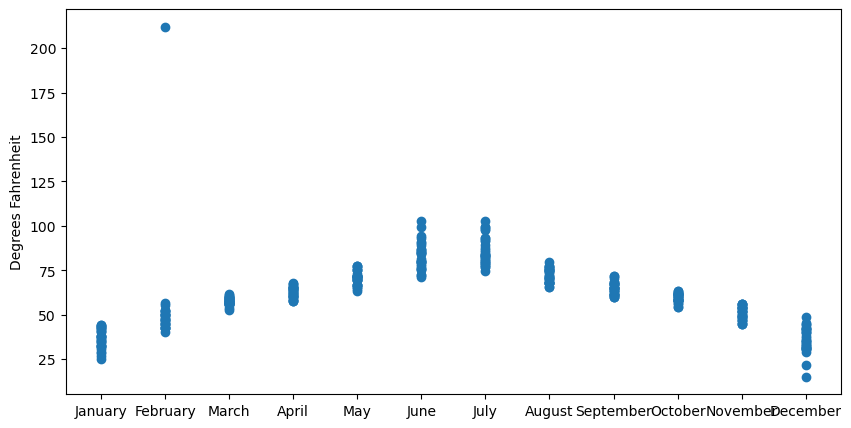

In [6]:
# Visualize data with continuous features
# Look for anomalies in temperature data
plt.figure(figsize=(10,5))
plt.scatter(df.month, df.Temperature)
plt.ylabel("Degrees Fahrenheit")
plt.show()

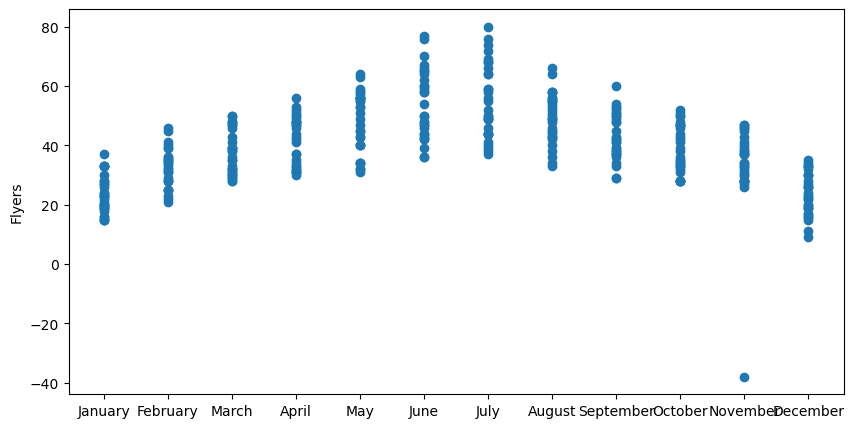

In [7]:
# Look for anomalies in the flyers data
plt.figure(figsize=(10,5))
plt.scatter(df.month, df.Flyers)
plt.ylabel("Flyers")
plt.show()

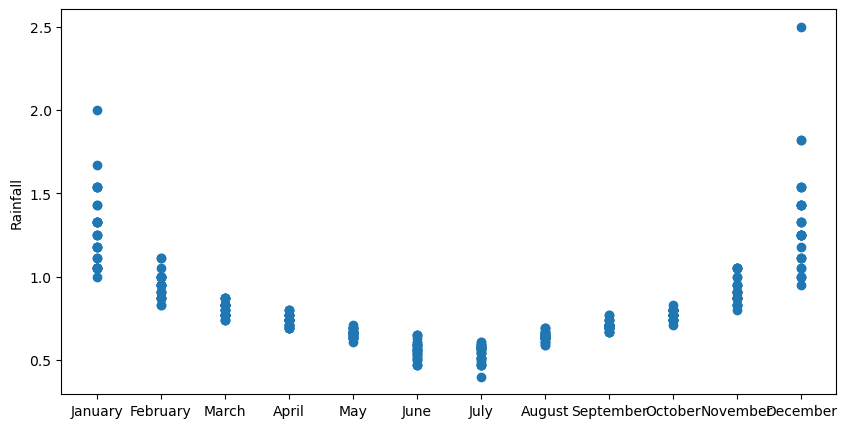

In [8]:
# Look for anomalies in the rainfall data
plt.figure(figsize=(10,5))
plt.scatter(df.month, df.Rainfall)
plt.ylabel("Rainfall")
plt.show()

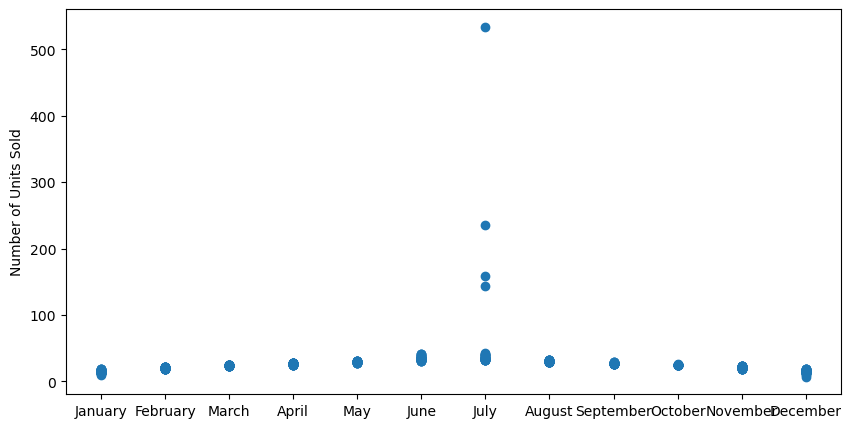

In [9]:
# Look for anomalies in the sales data
plt.figure(figsize=(10,5))
plt.scatter(df.month, df.Sales)
plt.ylabel("Number of Units Sold")
plt.show()

In [10]:
# at a multiplier of 1.5:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 16.700000000000003
 Upper bound for Temperature: 104.7

-----------------
 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

-----------------
 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

-----------------


In [11]:
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


In [12]:
outliers['Flyers']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June
2017-07-14,Friday,92.0,0.50,80,0.5,40,July
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November


In [13]:
outliers['Sales']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


In [14]:
outliers['Rainfall']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-06,Friday,25.3,1.54,23,0.5,11,January
2017-01-07,Saturday,32.9,1.54,19,0.5,13,January
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,January
2017-01-12,Thursday,38.2,1.33,16,0.5,14,January
2017-01-13,Friday,37.5,1.33,19,0.5,15,January
2017-01-16,Monday,30.6,1.67,24,0.5,12,January


In [15]:
Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

# at a multiplier of 3:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], multiplier=3)
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

Object `kept` not found.
Object `kept` not found.
 Lower bound for Temperature : -16.299999999999997
 Upper bound for Temperature: 137.7

-----------------
 Lower bound for Rainfall : -0.13
 Upper bound for Rainfall: 1.69

-----------------
 Lower bound for Flyers : -23.0
 Upper bound for Flyers: 103.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : -10.0
 Upper bound for Sales: 60.0

-----------------


Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
Should certain outliers be kept or removed?

In [16]:
z_outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        if df[col].std() != 0:
            z_score = (df[col] - df[col].mean()) / df[col].std()
            print(f' z score for {col} is {z_score}\n')
            print('-----------------')
            z_outliers[col] = {}
            z_outliers[col]['z_score'] = {'z_score' : z_score}
            z_outliers[col]['df'] = df[((df[col] - df[col].mean()) / df[col].std()).abs() >=2]
        else:
            pass
    else:
        pass

 z score for Temperature is Date
2017-01-01   -1.892340
2017-01-02   -1.787286
2017-01-03   -1.477652
2017-01-04   -0.946852
2017-01-05   -1.040848
                ...   
2017-12-27   -1.024260
2017-12-28   -1.295189
2017-12-29   -1.201194
2017-12-30   -1.676702
2017-12-31   -2.550311
Name: Temperature, Length: 365, dtype: float64

-----------------
 z score for Rainfall is Date
2017-01-01    4.286488
2017-01-02    1.840253
2017-01-03    1.840253
2017-01-04    0.817946
2017-01-05    0.635391
                ...   
2017-12-27    0.635391
2017-12-28    1.548165
2017-12-29    1.548165
2017-12-30    2.205363
2017-12-31    6.112037
Name: Rainfall, Length: 365, dtype: float64

-----------------
 z score for Flyers is Date
2017-01-01   -1.820927
2017-01-02   -1.820927
2017-01-03   -0.950507
2017-01-04   -0.877972
2017-01-05   -0.515297
                ...   
2017-12-27   -0.515297
2017-12-28   -0.587832
2017-12-29   -1.675857
2017-12-30   -1.313182
2017-12-31   -2.256137
Name: Flyers, Length:

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [17]:
z_outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        if df[col].std() != 0:
            z_score = (df[col] - df[col].mean()) / df[col].std()
            print(f' z score for {col} is {z_score}\n')
            print('-----------------')
            z_outliers[col] = {}
            z_outliers[col]['z_score'] = {'z_score' : z_score}
            z_outliers[col]['df'] = df[((df[col] - df[col].mean()) / df[col].std()).abs() >=3]
        else:
            pass
    else:
        pass

 z score for Temperature is Date
2017-01-01   -1.892340
2017-01-02   -1.787286
2017-01-03   -1.477652
2017-01-04   -0.946852
2017-01-05   -1.040848
                ...   
2017-12-27   -1.024260
2017-12-28   -1.295189
2017-12-29   -1.201194
2017-12-30   -1.676702
2017-12-31   -2.550311
Name: Temperature, Length: 365, dtype: float64

-----------------
 z score for Rainfall is Date
2017-01-01    4.286488
2017-01-02    1.840253
2017-01-03    1.840253
2017-01-04    0.817946
2017-01-05    0.635391
                ...   
2017-12-27    0.635391
2017-12-28    1.548165
2017-12-29    1.548165
2017-12-30    2.205363
2017-12-31    6.112037
Name: Rainfall, Length: 365, dtype: float64

-----------------
 z score for Flyers is Date
2017-01-01   -1.820927
2017-01-02   -1.820927
2017-01-03   -0.950507
2017-01-04   -0.877972
2017-01-05   -0.515297
                ...   
2017-12-27   -0.515297
2017-12-28   -0.587832
2017-12-29   -1.675857
2017-12-30   -1.313182
2017-12-31   -2.256137
Name: Flyers, Length: